In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from xgboost import XGBRegressor


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Boston_Housing_Data.csv')
dataset.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
dataset.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [7]:
dataset.dropna(inplace = True)

In [10]:
#Rename the Medv column
dataset.rename(columns = {'MEDV':'Price'}, inplace = True)
dataset.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


# Check the correlation in data

In [11]:
# Check positive an dnegative correlation
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.188075,0.391552,-0.051970,0.416160,-0.227170,0.341311,-0.365052,0.608667,0.560841,0.265428,-0.386254,0.461906,-0.397230
ZN,-0.188075,1.000000,-0.521256,-0.033357,-0.515660,0.343210,-0.568174,0.645359,-0.298773,-0.305768,-0.422164,0.169894,-0.415041,0.406822
INDUS,0.391552,-0.521256,1.000000,0.049820,0.762737,-0.403068,0.642387,-0.696569,0.591944,0.734204,0.395691,-0.344788,0.598156,-0.510829
CHAS,-0.051970,-0.033357,0.049820,1.000000,0.076661,0.095308,0.072644,-0.095037,0.014102,-0.026513,-0.104995,0.068913,-0.037113,0.173701
NOX,0.416160,-0.515660,0.762737,0.076661,1.000000,-0.316563,0.732540,-0.768137,0.628170,0.679824,0.210216,-0.384257,0.593655,-0.459054
RM,-0.227170,0.343210,-0.403068,0.095308,-0.316563,1.000000,-0.248670,0.218713,-0.236057,-0.320561,-0.390686,0.123320,-0.636226,0.723951
AGE,0.341311,-0.568174,0.642387,0.072644,0.732540,-0.248670,1.000000,-0.753547,0.443585,0.504472,0.264968,-0.281990,0.601137,-0.407470
DIS,-0.365052,0.645359,-0.696569,-0.095037,-0.768137,0.218713,-0.753547,1.000000,-0.477075,-0.529603,-0.228840,0.285168,-0.505036,0.279547
RAD,0.608667,-0.298773,0.591944,0.014102,0.628170,-0.236057,0.443585,-0.477075,1.000000,0.900000,0.441949,-0.444135,0.510868,-0.416638
TAX,0.560841,-0.305768,0.734204,-0.026513,0.679824,-0.320561,0.504472,-0.529603,0.900000,1.000000,0.446961,-0.435457,0.572218,-0.508864


<Axes: >

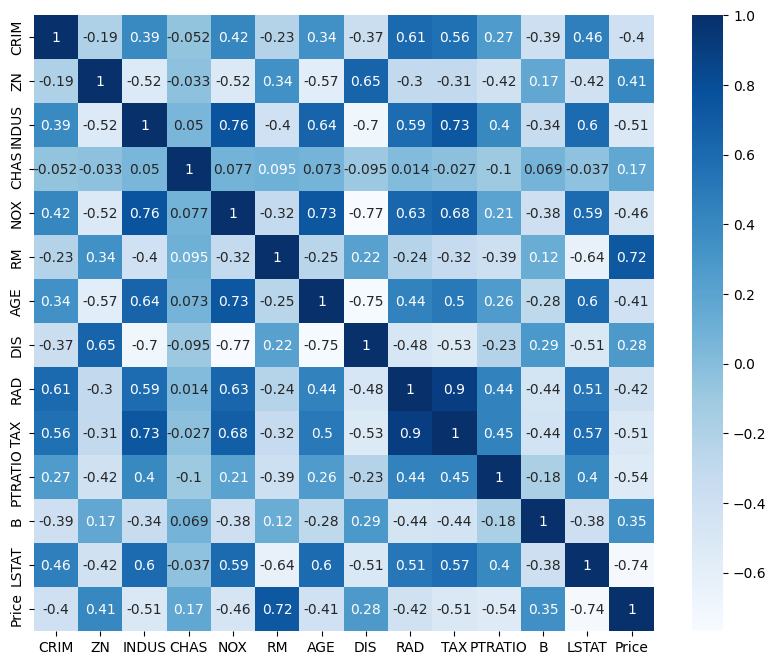

In [18]:
# plotting the correlation
plt.figure(figsize = (10,8))
sns.heatmap(dataset.corr(), annot = True , cmap= 'Blues')

# Splitting of data and train test the model

In [21]:
x = dataset.drop(columns={'Price'},axis=1)
y = dataset['Price']

print("Splitting successfullyh completed \n")

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

print("The shape of the x train is :-",x_train.shape)
print("The shape of the x test is :-",x_test.shape)
print("The shape of the y train is :-",y_train.shape)
print("The shape of the y test is :-",y_test.shape)

Splitting successfullyh completed 

The shape of the x train is :- (315, 13)
The shape of the x test is :- (79, 13)
The shape of the y train is :- (315,)
The shape of the y test is :- (79,)


In [24]:
# model = LinearRegression()
model = XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Model evaluation

In [29]:
# on training data
training_data_prediction = model.predict(x_train)
print("The R Squared score is :- ",r2_score(y_train,training_data_prediction))
print("The mean squared error is :- ",mean_squared_error(y_train,training_data_prediction))
print("The mean absolute error is :- ",mean_absolute_error(y_train,training_data_prediction))

The R Squared score is :-  0.9999990967949034
The mean squared error is :-  7.711008818547663e-05
The mean absolute error is :-  0.006078408559163554


In [30]:
# test on testing data
testing_data_prediction = model.predict(x_test)
print("The R Squared score is :- ",r2_score(y_test,testing_data_prediction))
print("The mean squared error is :- ",mean_squared_error(y_test,testing_data_prediction))
print("The mean absolute error is :- ",mean_absolute_error(y_test,testing_data_prediction))

The R Squared score is :-  0.8470798633773929
The mean squared error is :-  11.253817482477404
The mean absolute error is :-  2.254431766799734


# Perform the visualization

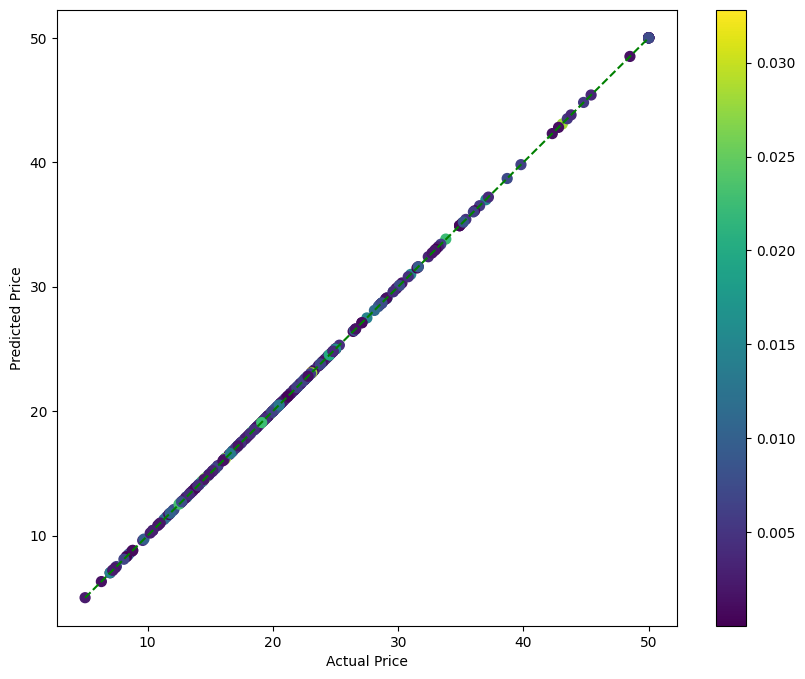

In [48]:
error = np.abs(y_train-training_data_prediction)
plt.figure(figsize = (10,8))
plt.scatter(y_train,training_data_prediction,c=error,s=50)
plt.plot([min(y_train),max(y_train)],[min(y_train),max(y_train)],color='green',linestyle='--')
plt.colorbar()
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

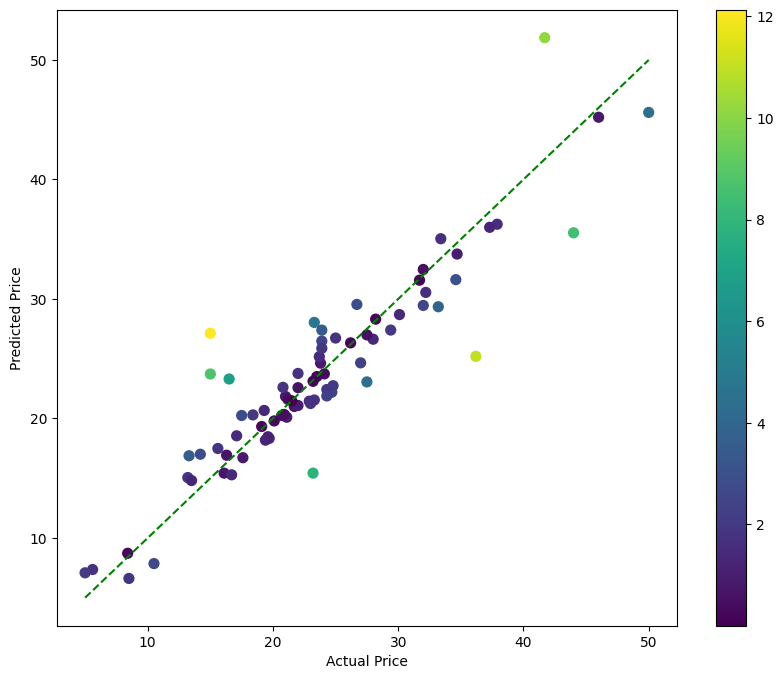

In [50]:
error = np.abs(y_test - testing_data_prediction)
plt.figure(figsize = (10,8))
plt.scatter(y_test,testing_data_prediction,c=error,s=50)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='green',linestyle='--')
plt.colorbar()
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()